# Unsupervised Learning Using K-Means Clustering on California Housing Data

In this assignment, we will utilize the MNIST dataset to develop a deep Multi-Layer Perceptron (MLP) mode. Our goal is to apply the Keras Tuner to find the best hyperparameter to optimize the MLP model's performance, aiming to achieve a test accuracy of at least 98%. 

In this notebook, we will:

1. Train a Deep MLP Model on the MNIST Dataset: Set up a deep MLP model for classifying handwritten digits from the MNIST dataset. 
2. Hyperparameter Tuning with Keras Tuner: Use Keras Tuner to perform hyperparameter tuning on the model. Search for optimal values of key hyperparameters, such as, number of Hidden Layers and units in a hidden layer, learning rate, and batch size. Configure Keras Tuner to use Random Search to find the best hyperparameter values.
3. Analyze the Tuning Results: Once tuning is complete, evaluate the model’s performance with the best-found hyperparameters on the test set. Present results, including metrics such as accuracy, training time, and convergence rate. Discuss the chosen hyperparameters and explain how they contributed to achieving high accuracy on the MNIST dataset.
4. Comparison with Baseline Model (Optional) Optionally, compare the tuned MLP model's accuracy with the models we used for classification in our early labs on classification for MNIST dataset. Analyze and discuss the improvement in the performance.


# Preparation

In [61]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


# Prepare the MNIST dataset

In [62]:
from tensorflow import keras
# MNIST data is loaded, normalized, and split into training, validation, and test sets
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train_full = X_train_full / 255.0

X_test = X_test / 255.0
# (10000, 28, 28)

X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
# (5000, 28, 28), (55000, 28, 28)

y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
# (5000,), (55000,)

# Train a Deep MLP Model on the MNIST Dataset:

In [63]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [64]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [65]:
# We will start with a small learning rate of 1e-3
# and grow it by 0.5% at each iteration:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [66]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\my_mnist_logs\\run_001'

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3542 - accuracy: 0.9025 - val_loss: 0.3277 - val_accuracy: 0.9122
Epoch 2/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3382 - accuracy: 0.9056 - val_loss: 0.3136 - val_accuracy: 0.9138
Epoch 3/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3248 - accuracy: 0.9085 - val_loss: 0.3018 - val_accuracy: 0.9198
Epoch 4/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3134 - accuracy: 0.9116 - val_loss: 0.2917 - val_accuracy: 0.9202
Epoch 5/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3035 - accuracy: 0.9142 - val_loss: 0.2828 - val_accuracy: 0.9216
Epoch 6/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2947 - accuracy: 0.9167 - val_loss: 0.2749 - val_accuracy: 0.9240
Epoch 7/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2867 - accuracy: 0.9184 - val_loss: 0.2674 - val_accuracy:

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.4346 - accuracy: 0.8879
Test accuracy: 0.8879


In [70]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2169 - accuracy: 0.9383


[0.21692736446857452, 0.9383000135421753]

In [69]:
%tensorboard --logdir=./my_mnist_logs --port=6006

UsageError: Line magic function `%tensorboard` not found.


Text(0, 0.5, 'Loss')

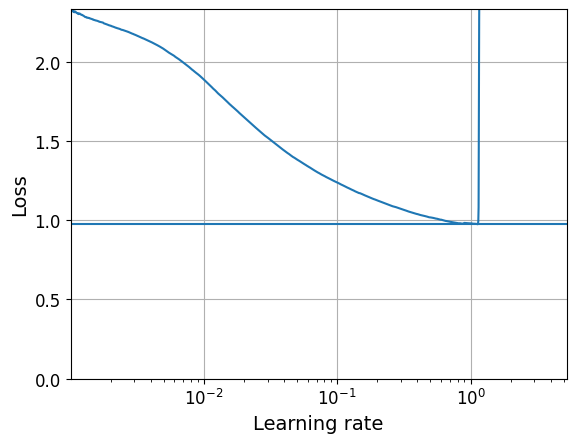

In [ ]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

# Hyperparameter Tuning with Keras Tuner: 

# Analyze the Tuning Results:

# Comparison with Baseline Model (Optional)